# SUPPORT VECTOR MACHINE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

## Task 1: Exploratory Data Analysis (EDA)

In [5]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1024)

In [7]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
num_col=df.select_dtypes(["int","float"])
num_col

,Unnamed: 0,stalk_height,cap_diameter
0,1167,14.276173,5.054983
1,1037,3.952715,19.068319
2,309,9.054265,7.205884
3,282,5.226499,20.932692
4,820,14.037532,12.545245
...,...,...,...
971,877,13.020616,9.993008
972,926,3.751597,18.868135
973,289,13.134058,15.740028
974,1160,6.500840,13.501957


In [10]:
cat_col=df.select_dtypes(["object"])
cat_col

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,red,yellow,universal,brown,none,large,brown,numerous,paths,edible
972,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,pink,pink,partial,brown,two,pendant,yellow,numerous,grasses,poisonous
973,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,brown,red,universal,orange,two,none,orange,abundant,grasses,edible
974,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous


<Axes: >

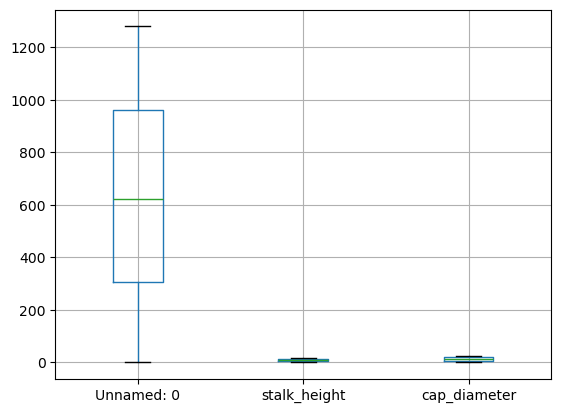

In [11]:
df.boxplot()

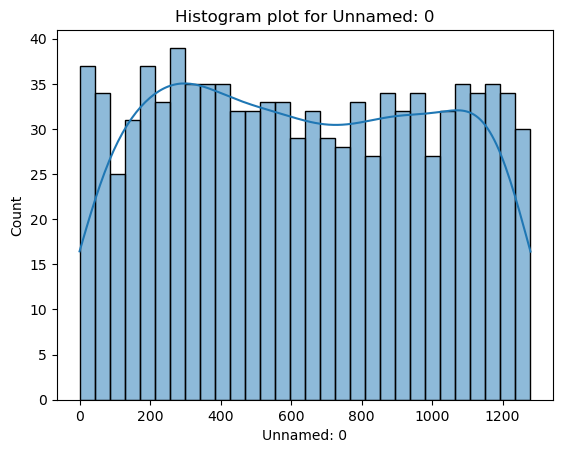

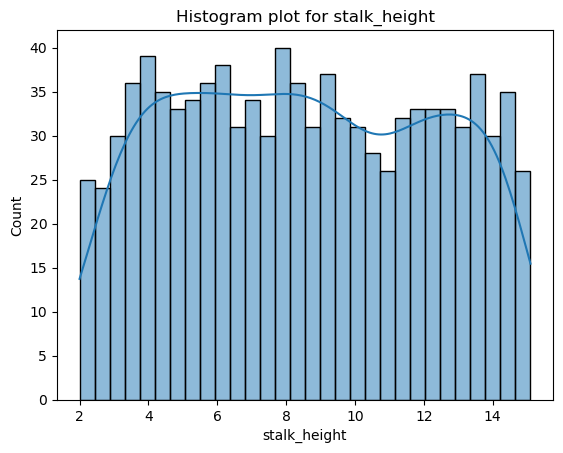

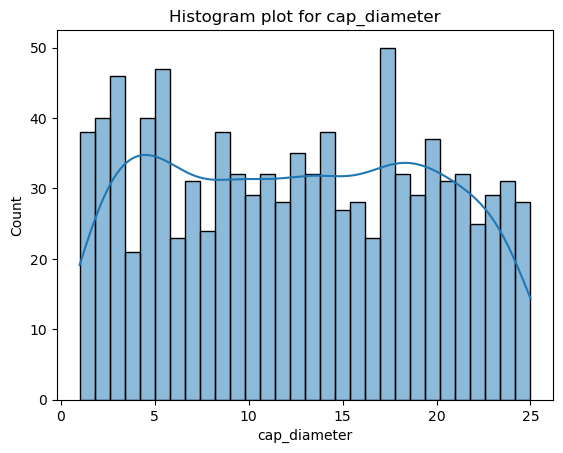

In [12]:
for i in num_col:
    plt.figure()
    sns.histplot(df[i],kde=True,bins=30)
    plt.title(f'Histogram plot for {i}')
    plt.show()

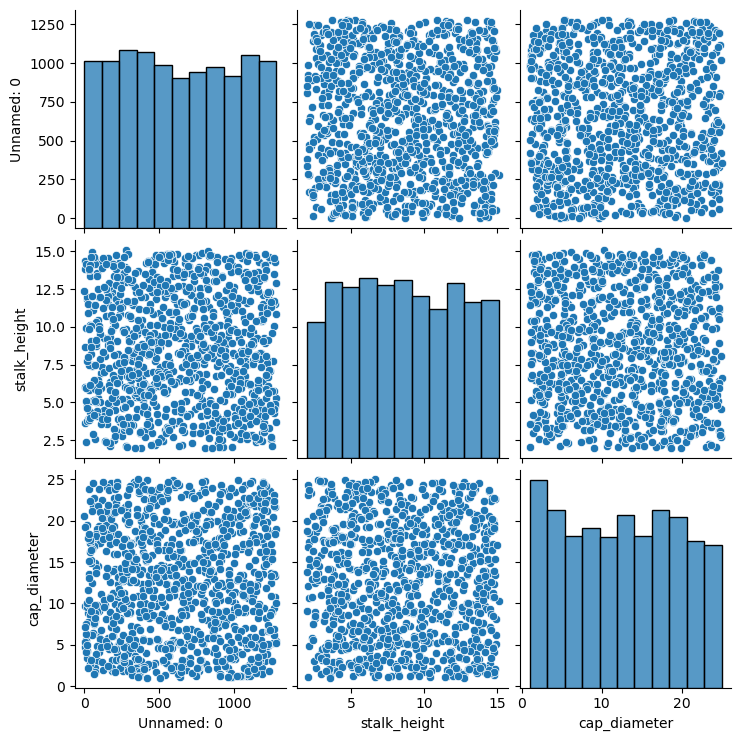

In [13]:
sns.pairplot(df)
plt.show()

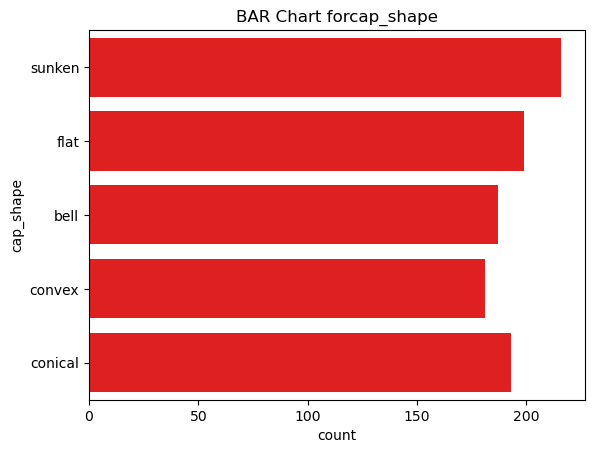

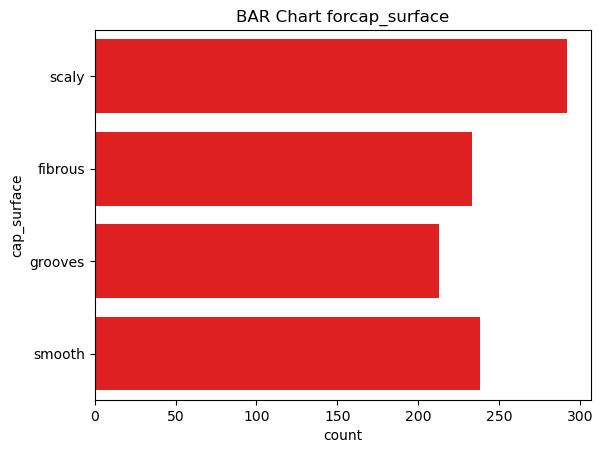

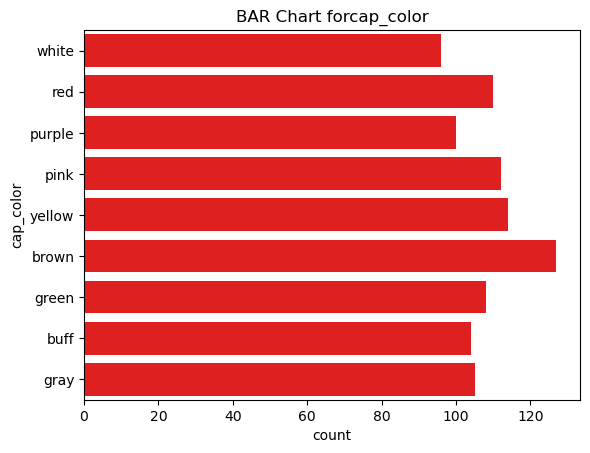

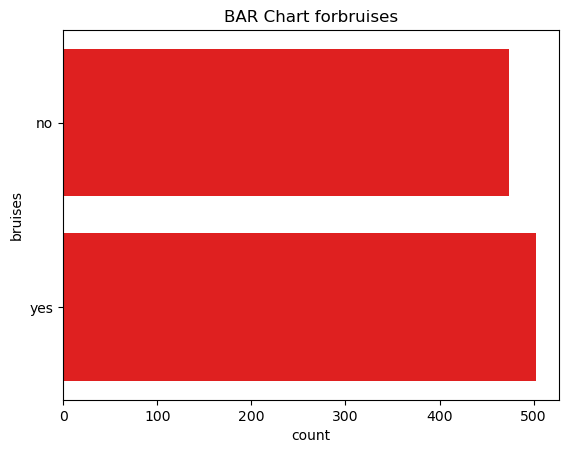

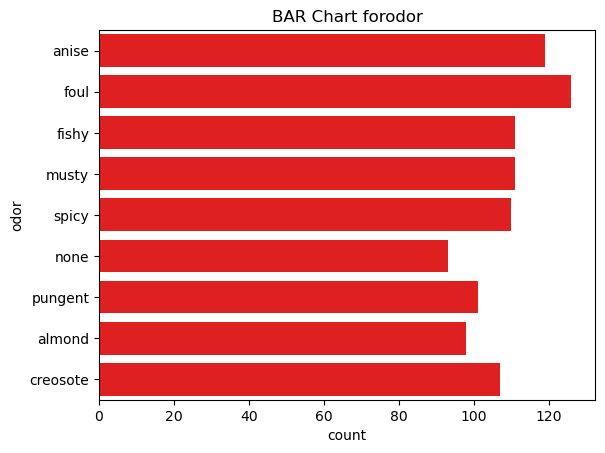

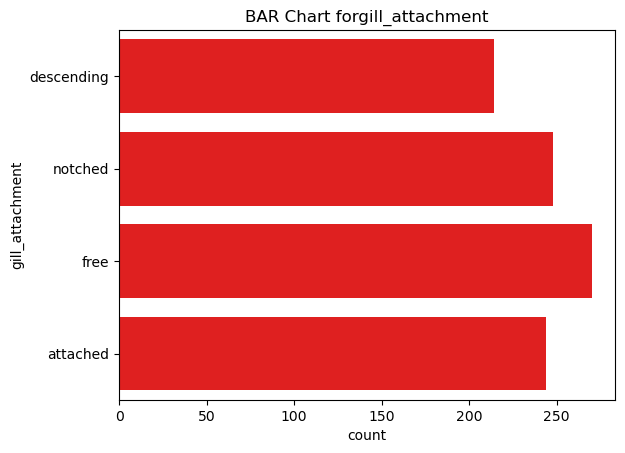

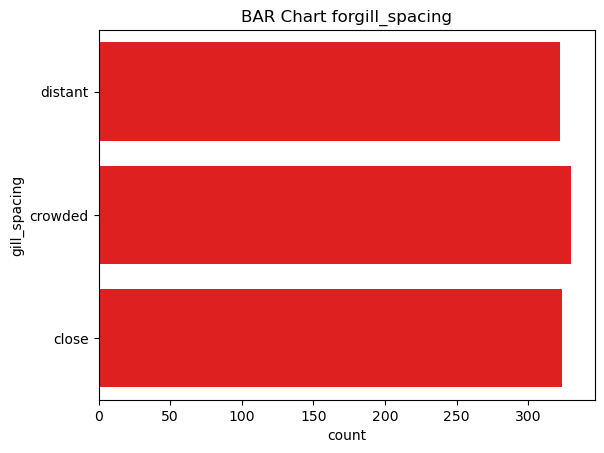

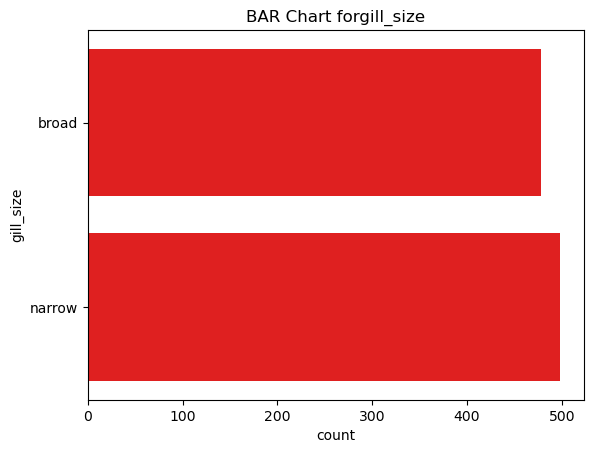

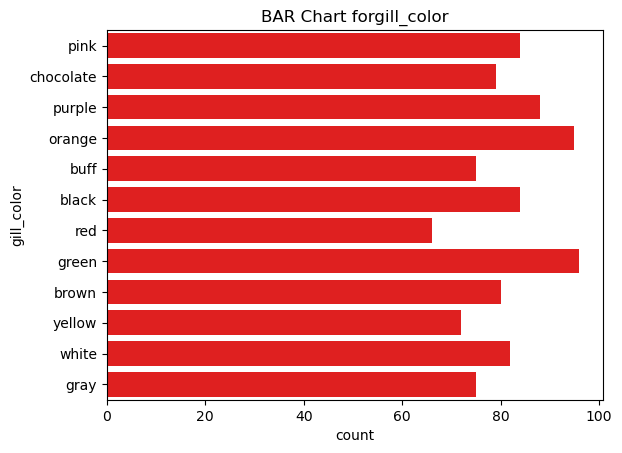

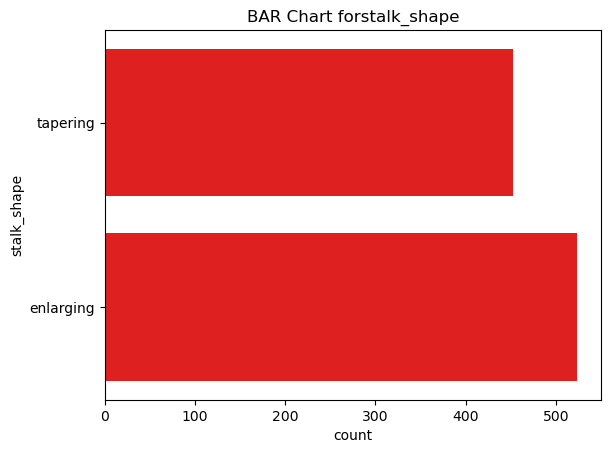

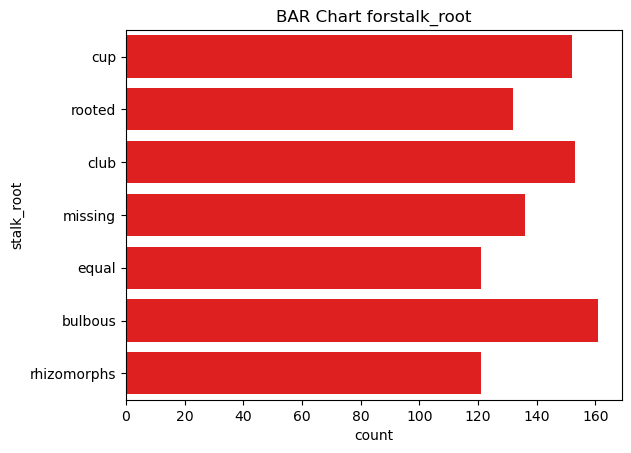

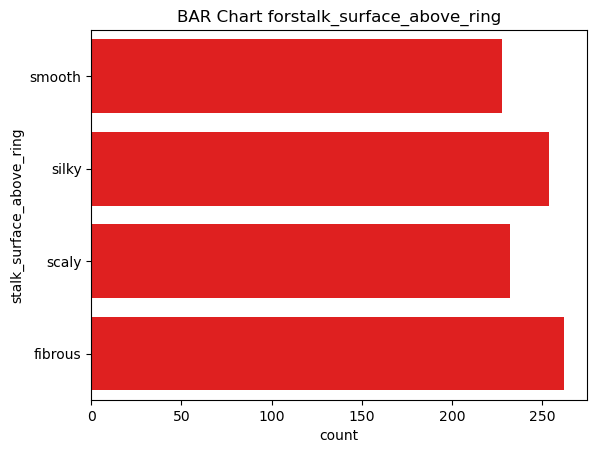

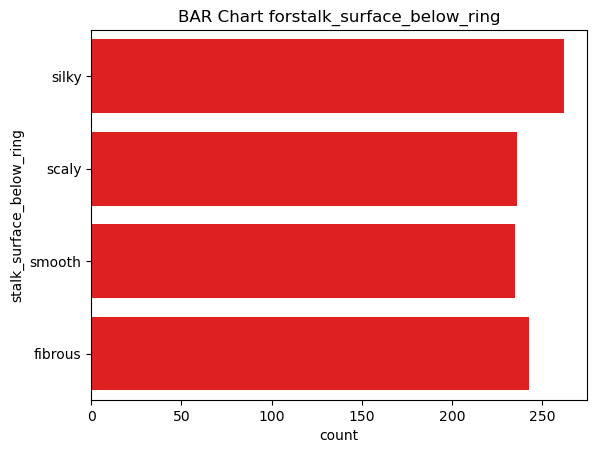

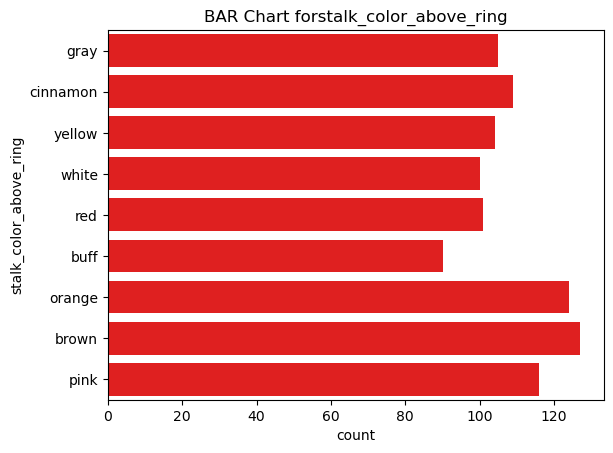

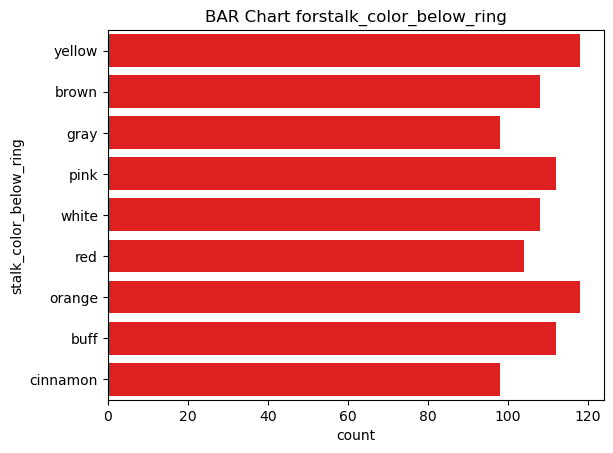

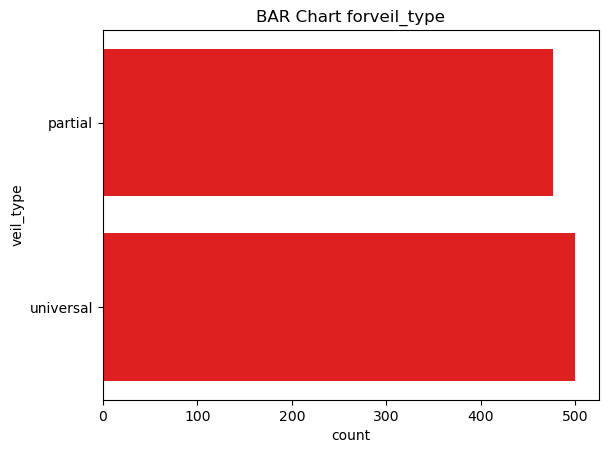

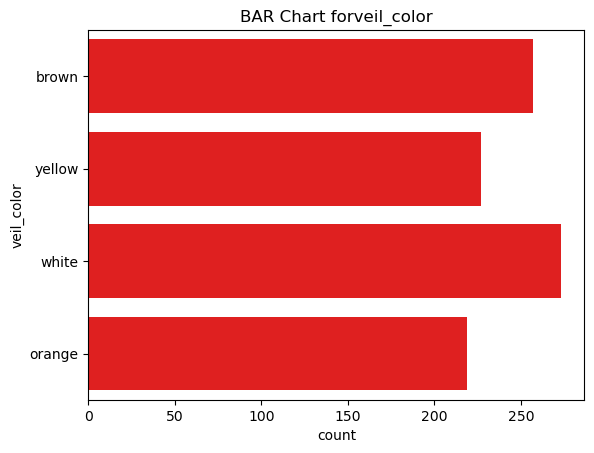

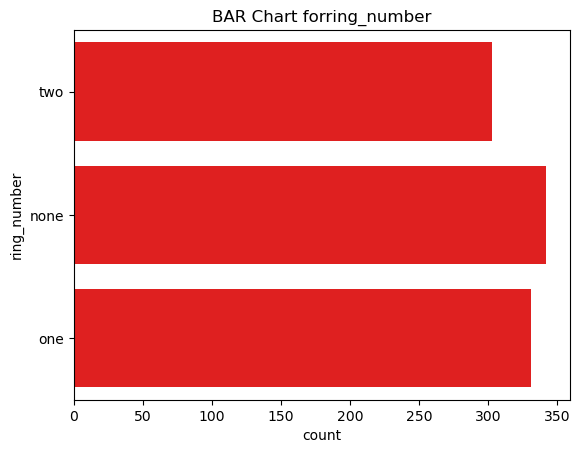

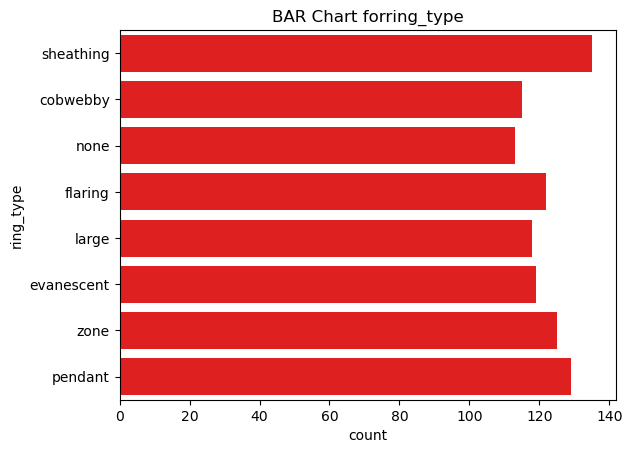

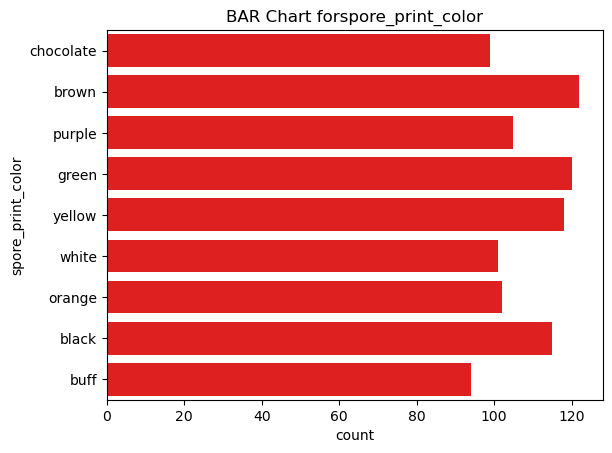

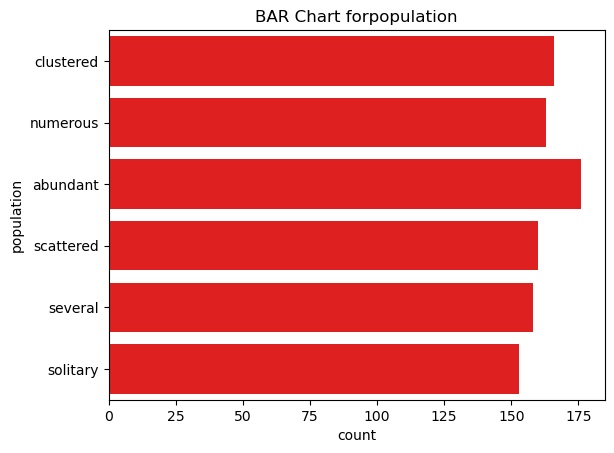

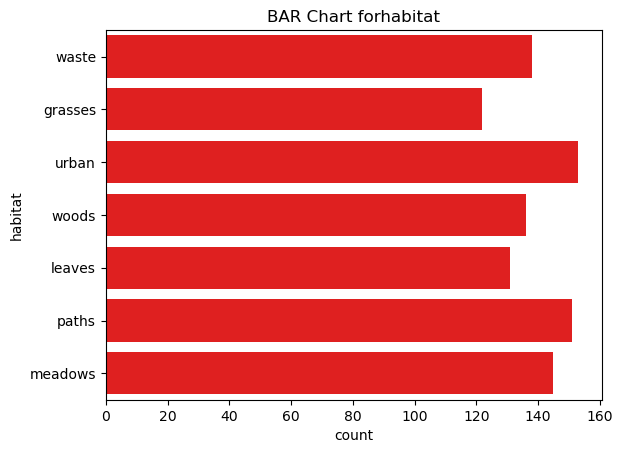

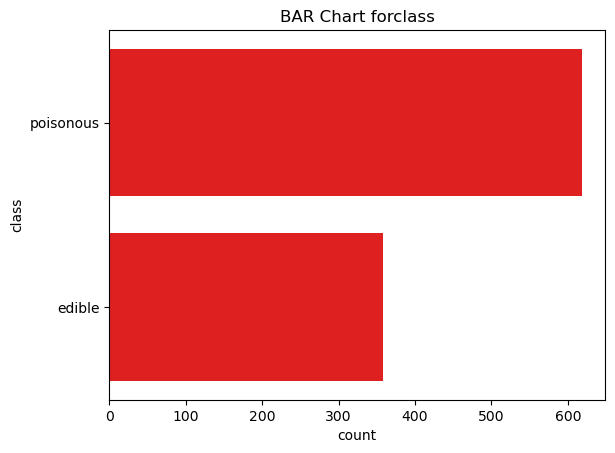

In [14]:
for cat_col1 in cat_col:
    plt.figure()
    sns.countplot(df[cat_col1],color="red")
    plt.title(f"BAR Chart for{cat_col1}")
    plt.show()

### LabelEncoder for catagorical columns

In [15]:
label_encoders={}
for col in cat_col:
    label_enc=LabelEncoder()
    df[col]=label_enc.fit_transform(df[col])
    label_encoders[col]=label_enc
label_encoders[col]

LabelEncoder()

### split features and target

In [16]:
target=df[["class"]]
features=df.drop(columns=["class"])

In [17]:
target.head()

,class
0,1
1,0
2,1
3,1
4,1


In [18]:
features.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,14.037532,12.545245


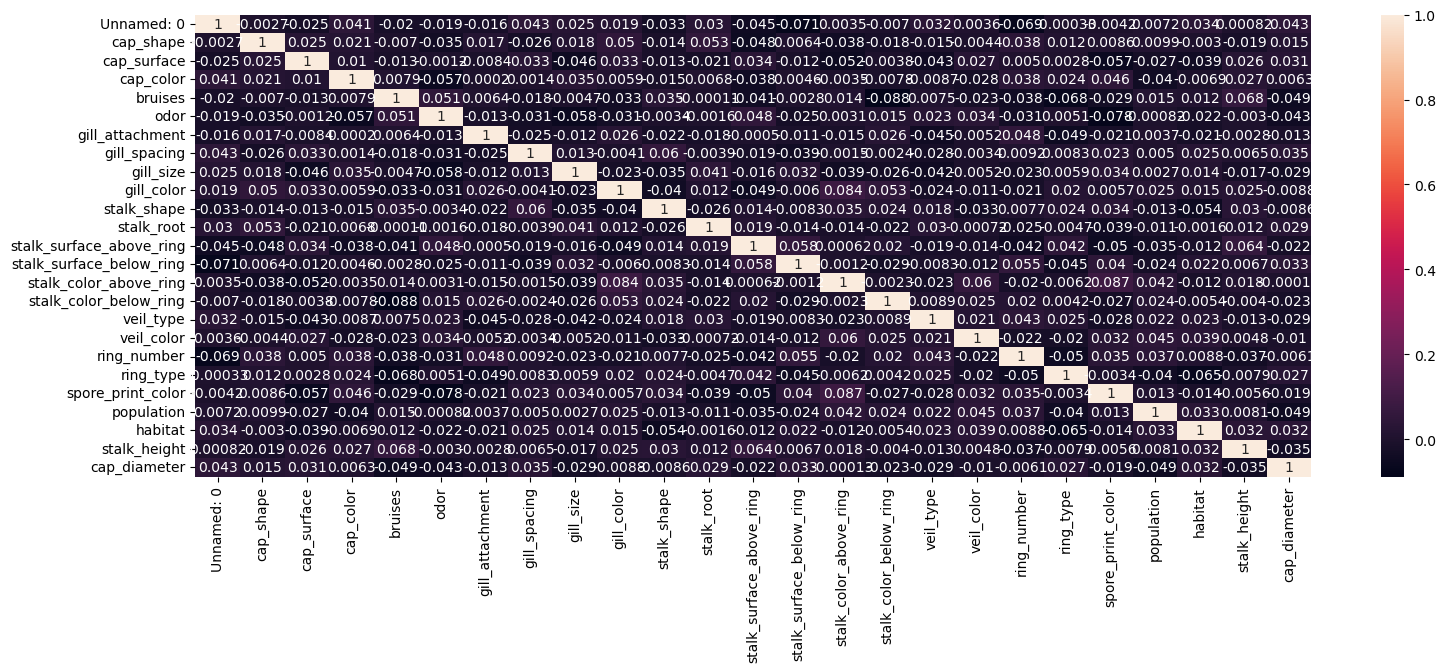

In [19]:
corr=features.corr()
plt.figure(figsize=(18,6))
sns.heatmap(corr,annot=True)
plt.show()

### Train and Split the data

In [20]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(780, 25)
(196, 25)
(780, 1)
(196, 1)


In [21]:
svc=SVC(C=5,kernel="rbf",gamma=0.1)
svc.fit(x_train,y_train)

SVC(C=5, gamma=0.1)

# Evaluation Metrics

In [22]:
y_pred=svc.predict(x_test)
y_pred
accuracy_score(y_test,y_pred)

0.6071428571428571

In [23]:
f1_score(y_test,y_pred)

0.7555555555555555

In [24]:
precision_score(y_test,y_pred)

0.6071428571428571

In [25]:
recall_score(y_test,y_pred)

1.0

### confusion matrix

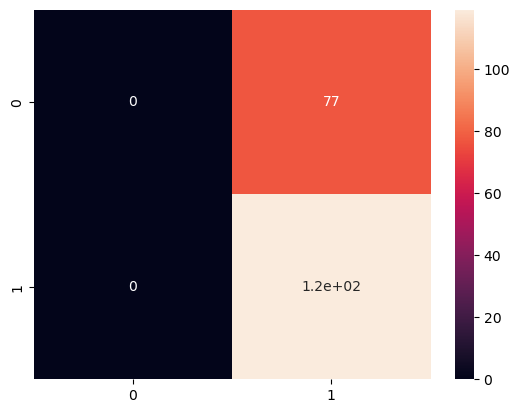

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
conf=confusion_matrix(y_test,y_pred)
conf
sns.heatmap(conf,annot=True)
plt.show()

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.61      1.00      0.76       119

    accuracy                           0.61       196
   macro avg       0.30      0.50      0.38       196
weighted avg       0.37      0.61      0.46       196



### Visualization of SVM Results

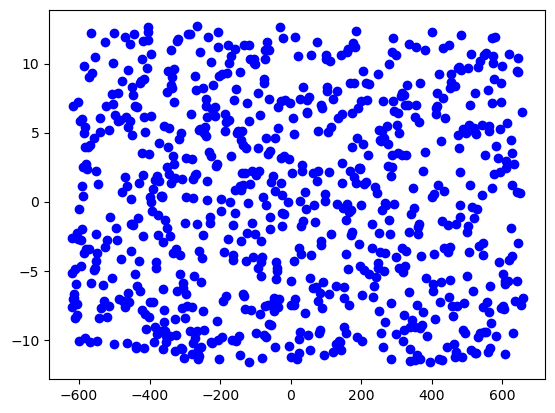

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_reduced=pca.fit_transform(x_train,y_train)
plt.scatter(X_reduced[:,0], X_reduced[:, 1],color="blue")
plt.show()

### Parameter Tuning and Optimization

In [29]:
np.arange(0,0.5,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4])

In [ ]:
# GridSearchCV
params={'C':range(1,10),'kernel':['linear','poly','rbf','sigmoid'],'gamma':np.arange(0,0.5,0.1)}
grid_search=GridSearchCV(svc,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

### Comparison and Analysis

In [35]:
svc=SVC(C=5,kernel="linear",gamma=0.1)
svc.fit(x_train,y_train)

SVC(C=5, gamma=0.1, kernel='linear')

In [32]:
y_pred=svc.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
accuracy_score(y_test,y_pred)

0.6326530612244898

In [34]:
svc=SVC(C=5,kernel="sigmoid",gamma=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6071428571428571

In [ ]:
svc=SVC(C=5,kernel="poly",gamma=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)